In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

from gaminet import GAMINet
from gaminet.utils import local_visualize
from gaminet.utils import global_visualize_density
from gaminet.utils import global_visualize_wo_density
from gaminet.utils import feature_importance_visualize
from gaminet.utils import plot_regularization
from gaminet.utils import plot_trajectory

In [2]:
task_type = "Classification"

data = pd.read_csv("./bank.csv", sep=";")
meta_info = json.load(open("./data_types.json"))
data['month'] = data['month'].replace('jan', 1).replace('feb', 2).replace('mar', 3).replace('apr', 4).\
                              replace('may', 5).replace('jun', 6).replace('jul', 7).replace('aug', 8).\
                              replace('sep', 9).replace('oct', 10).replace('nov', 11).replace('dec', 12)
x, y = data.iloc[:,:-1].values, data.iloc[:,[-1]].values
xx = np.zeros((x.shape[0], x.shape[1]), dtype=np.float32)
for i, (key, item) in enumerate(meta_info.items()):
    if item['type'] == 'target':
        enc = OrdinalEncoder()
        enc.fit(y)
        y = enc.transform(y)
        meta_info[key]['values'] = enc.categories_[0].tolist()
    elif item['type'] == 'categorical':
        enc = OrdinalEncoder()
        xx[:,[i]] = enc.fit_transform(x[:,[i]])
        meta_info[key]['values'] = []
        for item in enc.categories_[0].tolist():
            try:
                if item == int(item):
                    meta_info[key]['values'].append(str(int(item)))
                else:
                    meta_info[key]['values'].append(str(item))
            except ValueError:
                meta_info[key]['values'].append(str(item))
    else:
        sx = MinMaxScaler((0, 1))
        xx[:,[i]] = sx.fit_transform(x[:,[i]])
        meta_info[key]['scaler'] = sx
train_x, test_x, train_y, test_y = train_test_split(xx.astype(np.float32), y, test_size=0.2, random_state=0)

In [3]:
def metric_wrapper(metric, scaler):
    def wrapper(label, pred):
        return metric(label, pred, scaler=scaler)
    return wrapper

def auc(label, pred, scaler=None):
    return roc_auc_score(label, pred)

get_metric = metric_wrapper(auc, None)

####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.55909, val loss: 0.56050
Main effects training epoch: 2, train loss: 0.37479, val loss: 0.37261
Main effects training epoch: 3, train loss: 0.36113, val loss: 0.35766
Main effects training epoch: 4, train loss: 0.36005, val loss: 0.35652
Main effects training epoch: 5, train loss: 0.35897, val loss: 0.35554
Main effects training epoch: 6, train loss: 0.35776, val loss: 0.35414
Main effects training epoch: 7, train loss: 0.35637, val loss: 0.35278
Main effects training epoch: 8, train loss: 0.35500, val loss: 0.35122
Main effects training epoch: 9, train loss: 0.35312, val loss: 0.34943
Main effects training epoch: 10, train loss: 0.35120, val loss: 0.34752
Main effects training epoch: 11, train loss: 0.34901, val loss: 0.34519
Main effects training epoch: 12, train loss: 0.34632, val loss: 0.34255
Main effects training e

Main effects training epoch: 114, train loss: 0.22822, val loss: 0.22627
Main effects training epoch: 115, train loss: 0.22800, val loss: 0.22606
Main effects training epoch: 116, train loss: 0.22780, val loss: 0.22585
Main effects training epoch: 117, train loss: 0.22762, val loss: 0.22567
Main effects training epoch: 118, train loss: 0.22757, val loss: 0.22561
Main effects training epoch: 119, train loss: 0.22729, val loss: 0.22537
Main effects training epoch: 120, train loss: 0.22718, val loss: 0.22527
Main effects training epoch: 121, train loss: 0.22734, val loss: 0.22537
Main effects training epoch: 122, train loss: 0.22683, val loss: 0.22493
Main effects training epoch: 123, train loss: 0.22668, val loss: 0.22481
Main effects training epoch: 124, train loss: 0.22660, val loss: 0.22478
Main effects training epoch: 125, train loss: 0.22655, val loss: 0.22477
Main effects training epoch: 126, train loss: 0.22635, val loss: 0.22454
Main effects training epoch: 127, train loss: 0.226

Main effects training epoch: 227, train loss: 0.22292, val loss: 0.22304
Main effects training epoch: 228, train loss: 0.22312, val loss: 0.22318
Main effects training epoch: 229, train loss: 0.22292, val loss: 0.22306
Main effects training epoch: 230, train loss: 0.22306, val loss: 0.22333
Main effects training epoch: 231, train loss: 0.22287, val loss: 0.22308
Main effects training epoch: 232, train loss: 0.22288, val loss: 0.22306
Main effects training epoch: 233, train loss: 0.22285, val loss: 0.22306
Main effects training epoch: 234, train loss: 0.22286, val loss: 0.22311
Main effects training epoch: 235, train loss: 0.22282, val loss: 0.22308
Main effects training epoch: 236, train loss: 0.22284, val loss: 0.22306
Main effects training epoch: 237, train loss: 0.22282, val loss: 0.22313
Main effects training epoch: 238, train loss: 0.22280, val loss: 0.22311
Main effects training epoch: 239, train loss: 0.22286, val loss: 0.22317
Main effects training epoch: 240, train loss: 0.222

Interaction training epoch: 100, train loss: 0.20447, val loss: 0.20713
Interaction training epoch: 101, train loss: 0.20462, val loss: 0.20714
Interaction training epoch: 102, train loss: 0.20439, val loss: 0.20685
Interaction training epoch: 103, train loss: 0.20445, val loss: 0.20735
Interaction training epoch: 104, train loss: 0.20435, val loss: 0.20690
Interaction training epoch: 105, train loss: 0.20432, val loss: 0.20708
Interaction training epoch: 106, train loss: 0.20441, val loss: 0.20685
Interaction training epoch: 107, train loss: 0.20422, val loss: 0.20686
Interaction training epoch: 108, train loss: 0.20420, val loss: 0.20685
Interaction training epoch: 109, train loss: 0.20418, val loss: 0.20718
Interaction training epoch: 110, train loss: 0.20428, val loss: 0.20682
Interaction training epoch: 111, train loss: 0.20414, val loss: 0.20678
Interaction training epoch: 112, train loss: 0.20415, val loss: 0.20692
Interaction training epoch: 113, train loss: 0.20411, val loss: 

Interaction training epoch: 214, train loss: 0.20207, val loss: 0.20558
Interaction training epoch: 215, train loss: 0.20207, val loss: 0.20528
Interaction training epoch: 216, train loss: 0.20213, val loss: 0.20576
Interaction training epoch: 217, train loss: 0.20215, val loss: 0.20623
Interaction training epoch: 218, train loss: 0.20250, val loss: 0.20520
Interaction training epoch: 219, train loss: 0.20276, val loss: 0.20711
Interaction training epoch: 220, train loss: 0.20207, val loss: 0.20565
Interaction training epoch: 221, train loss: 0.20216, val loss: 0.20581
Interaction training epoch: 222, train loss: 0.20197, val loss: 0.20576
Interaction training epoch: 223, train loss: 0.20197, val loss: 0.20563
Interaction training epoch: 224, train loss: 0.20213, val loss: 0.20548
Interaction training epoch: 225, train loss: 0.20200, val loss: 0.20590
Interaction training epoch: 226, train loss: 0.20192, val loss: 0.20554
Interaction training epoch: 227, train loss: 0.20200, val loss: 

Fine tuning epoch: 38, train loss: 0.19966, val loss: 0.20375
Fine tuning epoch: 39, train loss: 0.19969, val loss: 0.20431
Fine tuning epoch: 40, train loss: 0.20068, val loss: 0.20436
Fine tuning epoch: 41, train loss: 0.20035, val loss: 0.20385
Fine tuning epoch: 42, train loss: 0.19959, val loss: 0.20417
Fine tuning epoch: 43, train loss: 0.19965, val loss: 0.20417
Fine tuning epoch: 44, train loss: 0.20001, val loss: 0.20386
Fine tuning epoch: 45, train loss: 0.19999, val loss: 0.20411
Fine tuning epoch: 46, train loss: 0.19946, val loss: 0.20428
Fine tuning epoch: 47, train loss: 0.19941, val loss: 0.20429
Fine tuning epoch: 48, train loss: 0.19954, val loss: 0.20369
Fine tuning epoch: 49, train loss: 0.19989, val loss: 0.20401
Fine tuning epoch: 50, train loss: 0.20025, val loss: 0.20564
Fine tuning epoch: 51, train loss: 0.19962, val loss: 0.20483
Fine tuning epoch: 52, train loss: 0.19946, val loss: 0.20357
Fine tuning epoch: 53, train loss: 0.19936, val loss: 0.20352
Fine tun

Fine tuning epoch: 170, train loss: 0.19799, val loss: 0.20358
Fine tuning epoch: 171, train loss: 0.19814, val loss: 0.20365
Fine tuning epoch: 172, train loss: 0.19830, val loss: 0.20346
Fine tuning epoch: 173, train loss: 0.19833, val loss: 0.20372
Fine tuning epoch: 174, train loss: 0.19781, val loss: 0.20347
Early stop at epoch 174, with validation loss: 0.20347
####################GAMI-Net training finished.####################


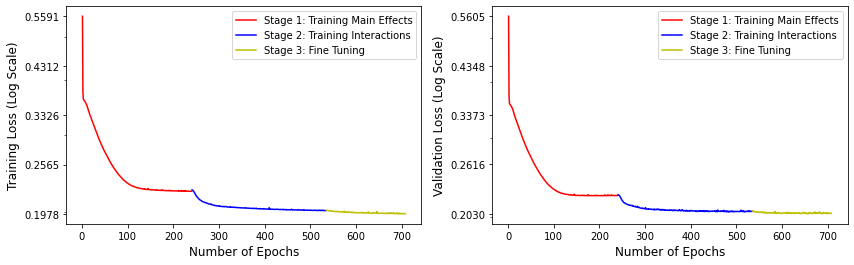

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


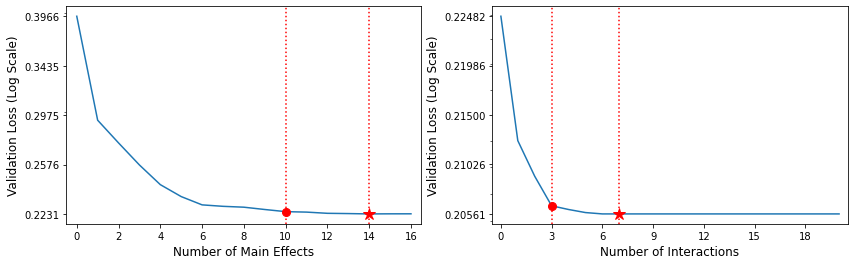

In [4]:
folder = "./results/"
if not os.path.exists(folder):
    os.makedirs(folder)

model_bank = GAMINet(meta_info=meta_info, interact_num=20,
            interact_arch=[40] * 5, subnet_arch=[40] * 5, 
            batch_size=200, task_type=task_type, activation_func=tf.nn.relu, 
            main_effect_epochs=5000, interaction_epochs=5000, tuning_epochs=500, 
            lr_bp=[0.0001, 0.0001, 0.0001], early_stop_thres=[50, 50, 50],
            heredity=True, loss_threshold=0.01, reg_clarity=0.1,
            mono_increasing_list=[11],
            mono_decreasing_list=[0], 
            lattice_size=10,
            verbose=True, val_ratio=0.2, random_state=0)
model_bank.fit(train_x, train_y, sample_weight=np.random.uniform(0, 1, size=(train_x.shape[0], 1)))
data_dict_logs = model_bank.summary_logs(save_dict=False)
plot_trajectory(data_dict_logs, folder=folder, name="bank_traj", save_png=True, save_eps=True)
plot_regularization(data_dict_logs, folder=folder, name="bank_regu", save_png=True, save_eps=True)

Global Interpretation

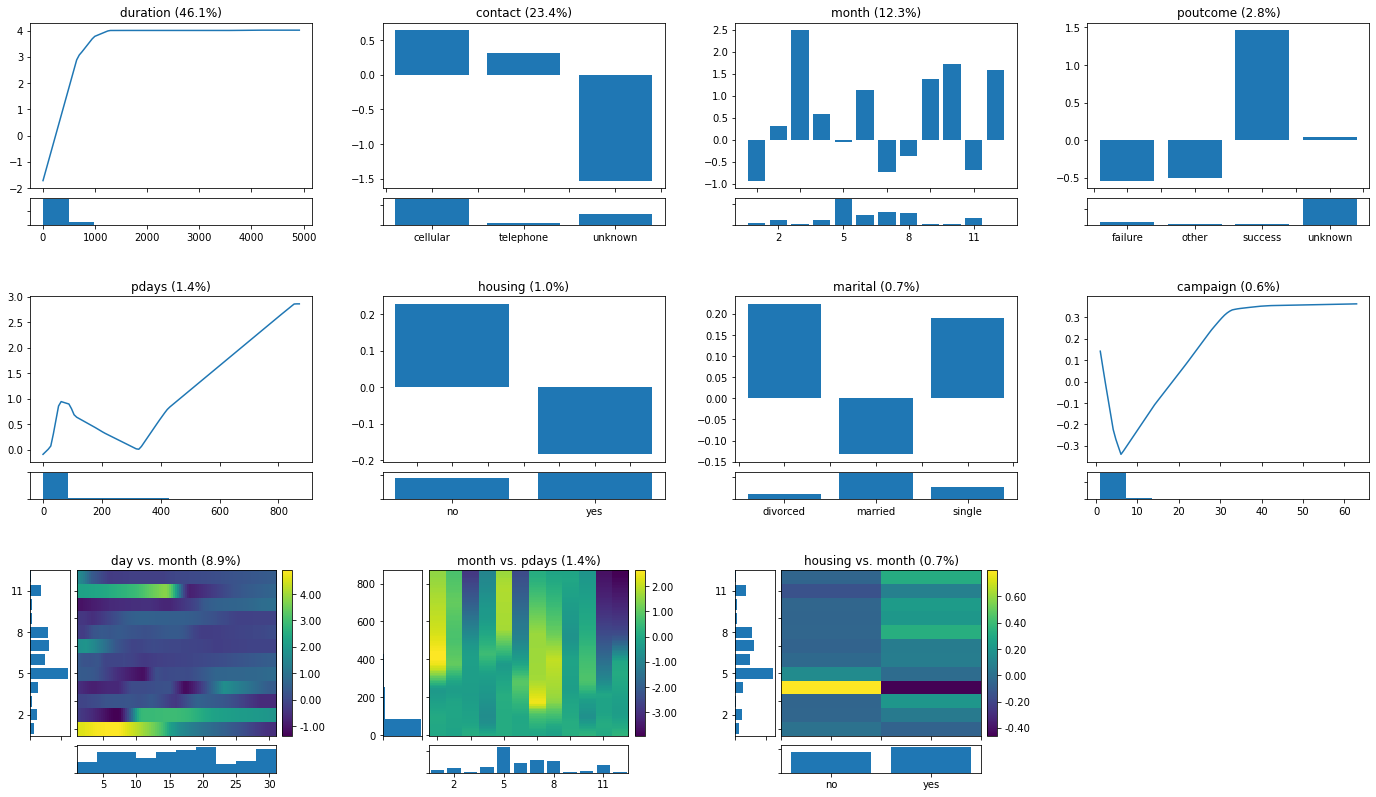

In [5]:
data_dict_global = model_bank.global_explain(save_dict=True, folder=folder, name="bank_global")
global_visualize_density(data_dict_global, folder=folder, name="bank_global",
                         main_effect_num=8, interaction_num=4, cols_per_row=4, save_png=True, save_eps=True)

Feature Importance

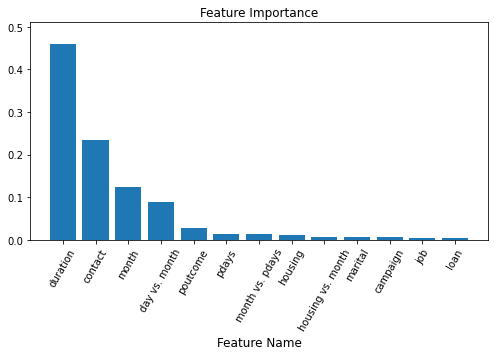

In [6]:
feature_importance_visualize(data_dict_global)

Interpret the prediction of a test sample

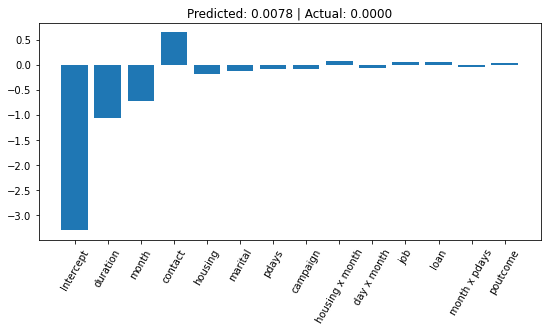

In [7]:
data_dict_local = model_bank.local_explain(test_x[[0]], test_y[[0]], save_dict=False)
local_visualize(data_dict_local[0], save_png=False)

## Model save and load 

In [8]:
model_bank.save(folder="./", name="model_saved")

In [9]:
## The reloaded model should not be refit again
modelnew = GAMINet(meta_info={})
modelnew.load(folder="./", name="model_saved")

In [10]:
pred_train = modelnew.predict(train_x)
pred_test = modelnew.predict(test_x)
gaminet_stat = np.hstack([np.round(get_metric(train_y, pred_train),5), 
                      np.round(get_metric(test_y, pred_test),5)])
print(gaminet_stat)

[0.9347 0.9214]
